<a href="https://colab.research.google.com/github/joren015/MercariProject/blob/main/CSCI5523_Mercari_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from Kaggle using Kaggle API
Create a Kaggle API key with your Kaggle account and upload the json to the Google Colab root directory.

In [1]:
%%shell
mkdir /root/.kaggle
mv ./kaggle.json /root/.kaggle/kaggle.json
chmod 600 /root/.kaggle/kaggle.json
kaggle competitions download -c mercari-price-suggestion-challenge
7za e train.tsv.7z
7za e test.tsv.7z

  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 68.0MB/s]
 98% 288M/294M [00:03<00:00, 118MB/s]
100% 294M/294M [00:04<00:00, 76.7MB/s]
 74% 25.0M/34.0M [00:00<00:00, 12.9MB/s]
100% 34.0M/34.0M [00:00<00:00, 49.3MB/s]
 64% 5.00M/7.77M [00:00<00:00, 40.0MB/s]
100% 7.77M/7.77M [00:00<00:00, 49.7MB/s]
 96% 71.0M/74.3M [00:01<00:00, 42.8MB/s]
100% 74.3M/74.3M [00:01<00:00, 59.1MB/s]

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      2% - train.tsv                  6% - train.tsv                  9% - tr

### Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load train and test datasets

In [ ]:
df_train = pd.read_csv("train.tsv", sep='\t')
df_test = pd.read_csv("test.tsv", sep='\t')

### Functions

In [ ]:
def describe_df(df):
  for col in df.columns:
    print(col)
    print(df[col].describe())
    print("null/nan count: {}".format(len(df) - len(df[col].dropna())))
    print("\n")

In [ ]:
def extract_sub_category(df):
  df["temp"] = df["category_name"].apply(lambda x: str(x).lower().split('/'))
  max_categories = df["temp"].apply(lambda x: len(x)).max()
  new_cols = []
  for i in range(max_categories):
    new_col = "category_{}".format(i+1)
    df[new_col] = df["temp"].apply(lambda x: x[i] if len(x) >= (i+1) else None)
    new_cols.append(new_col)

  df = df.drop("temp", axis=1)
  return df, new_cols

### Describe datasets

##### Train

In [ ]:
describe_df(df_train)

train_id
count    1.482535e+06
mean     7.412670e+05
std      4.279711e+05
min      0.000000e+00
25%      3.706335e+05
50%      7.412670e+05
75%      1.111900e+06
max      1.482534e+06
Name: train_id, dtype: float64
null/nan count: 0


name
count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object
null/nan count: 0


item_condition_id
count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64
null/nan count: 0


category_name
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object
null/nan count: 6327


brand_name
count     849853
unique      4809
top         PINK
freq       54088
Name: br

##### Test

In [ ]:
describe_df(df_test)

test_id
count    693359.000000
mean     346679.000000
std      200155.646984
min           0.000000
25%      173339.500000
50%      346679.000000
75%      520018.500000
max      693358.000000
Name: test_id, dtype: float64
null/nan count: 0


name
count     693359
unique    601117
top       Bundle
freq        1111
Name: name, dtype: object
null/nan count: 0


item_condition_id
count    693359.000000
mean          1.906102
std           0.903378
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: item_condition_id, dtype: float64
null/nan count: 0


category_name
count                                             690301
unique                                              1223
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               27900
Name: category_name, dtype: object
null/nan count: 3058


brand_name
count     397834
unique      3900
top         Nike
freq       2523

##### Unique sub categories

In [ ]:
df = pd.concat([df_train, df_test])
unique_categories = set(df["category_name"].apply(lambda x: str(x)).unique())
sub_categories = set()
for category in unique_categories:
  sub_categories = sub_categories.union(set([x.lower() for x in category.split('/')]))

sub_categories = list(sub_categories)
sub_categories.sort()
print("Category count: {}".format(len(unique_categories)))
print("Sub category count: {}\n".format(len(sub_categories)))
for c in sub_categories[0:10]:
  print(c)

Category count: 1311
Sub category count: 961

100 years or older
50 to 75 years
75 to 100 years
a-line
above knee, mini
accessories
accessory
aceo
action figure
action figures & statues


In [ ]:
for item_description in df["item_description"][0:10]:
  print(item_description)

No description yet
This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
Complete with certificate of authenticity
Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.
Size small but straps slightly shortened to fit xs, besides that, perfect condition
You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and you can take him today for less than the price of one item at the sto

##### Graphs

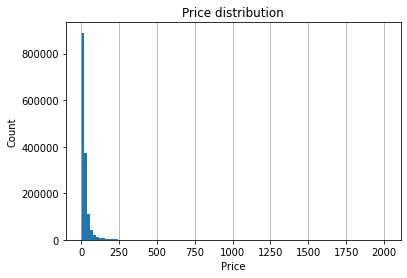

In [ ]:
df["price"].plot.hist(grid=True, bins=100)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y')

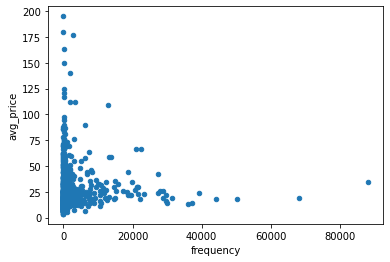

In [ ]:
df_category_freq_by_avg_price = df[["category_name", "price"]].groupby("category_name").agg(avg_price=pd.NamedAgg(column="price", aggfunc="mean"), frequency=pd.NamedAgg(column="category_name", aggfunc="count"))
df_category_freq_by_avg_price.plot.scatter(x="frequency", y="avg_price");

In [ ]:
df, new_cols = extract_sub_category(df)

In [ ]:
total_count = len(df)
for sub_category in sub_categories:
  df[sub_category] = np.logical_or.reduce([sub_category == df[col] for col in new_cols])
  print("P({}) = {}".format(sub_category, len(df[df[sub_category] == True]) / total_count))

P(100 years or older) = 8.73204301312472e-05
P(50 to 75 years) = 5.698807019091923e-05
P(75 to 100 years) = 2.9872778729110887e-05
P(a-line) = 0.000507837238394885
P(above knee, mini) = 0.013595331390223972
P(accessories) = 0.012386632804723024
P(accessory) = 1.9761992082334892e-05
P(aceo) = 4.5958121121709056e-07
P(action figure) = 0.0035746226608465302
P(action figures & statues) = 0.008419987370708315
P(action, adventure) = 8.27246180190763e-06
P(activity centers & entertainers) = 1.3327855125295626e-05
P(advertisement) = 1.8383248448683623e-06
P(afghan) = 5.974555745822177e-06
P(air conditioners) = 2.6655710250591252e-05
P(air fresheners) = 0.00029505113760137214
P(air purifiers) = 2.1140735715986164e-05
P(album) = 9.191624224341811e-07
P(all other sports) = 3.768565931980142e-05
P(amigurumi) = 1.3787436336512716e-06
P(amplifiers & effects) = 3.4928172052498884e-05
P(animal) = 0.00017372169784006023
P(animals) = 9.191624224341811e-07
P(animation) = 0.0020235360729888496
P(antique) 

In [ ]:
print(df[sub_categories])

        100 years or older  50 to 75 years  ...  yoga & pilates  zipper
0                    False           False  ...           False   False
1                    False           False  ...           False   False
2                    False           False  ...           False   False
3                    False           False  ...           False   False
4                    False           False  ...           False   False
...                    ...             ...  ...             ...     ...
693354               False           False  ...           False   False
693355               False           False  ...           False   False
693356               False           False  ...           False   False
693357               False           False  ...           False   False
693358               False           False  ...           False   False

[2175894 rows x 961 columns]


In [ ]:
df[["category_1", "category_2", "category_3", "category_4", "category_5"]]

,category_1,category_2,category_3,category_4,category_5
0,men,tops,t-shirts,None,None
1,electronics,computers & tablets,components & parts,None,None
2,women,tops & blouses,blouse,None,None
3,home,home décor,home décor accents,None,None
4,women,jewelry,necklaces,None,None
...,...,...,...,...,...
693354,home,home décor,home décor accents,None,None
693355,beauty,makeup,makeup sets,None,None
693356,electronics,cell phones & accessories,"cases, covers & skins",None,None
693357,women,swimwear,cover-ups,None,None


In [ ]:
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'test_id', 'category_1',
       ...
       'women's handbags', 'woodworking', 'wool', 'work & safety', 'wrap',
       'wristlet', 'writing', 'yarn', 'yoga & pilates', 'zipper'],
      dtype='object', length=975)

# Data Preprocessing
This section will output a dict of dataframes. Each dataframe will contain the cleaned data associated with a specific subcategory. The keys to the dict are the categories full names. The values are all the entries under that category.

###Read in data

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("train.tsv", sep='\t')
df_test = pd.read_csv("test.tsv", sep='\t')

In [129]:
print(df_train.shape)
print(df_train.columns)
print("null/nan count: {}".format(len(df_train) - len(df_train['category_name'].dropna())))
print("null/nan count: {}".format(len(df_test) - len(df_test['category_name'].dropna())))

(1482535, 8)
Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')
null/nan count: 6327
null/nan count: 3058


###Clean up raw dataset

In [130]:
df_train['brand_name'] = df_train['brand_name'].fillna(value='Other_Null')
df_train['category_name'] = df_train['category_name'].fillna(value='Other_Null')
df_train['item_description'] = df_train['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
print(df_train.isnull().sum())

df_test['brand_name'] = df_test['brand_name'].fillna(value='Other_Null')
df_test['category_name'] = df_test['category_name'].fillna(value='Other_Null')
df_test['item_description'] = df_test['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
df_test.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64


test_id              0
name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
dtype: int64

###Group based on category 

In [131]:
training_grouped = df_train.groupby(df_train.category_name)
testing_grouped = df_train.groupby(df_test.category_name)
print(training_grouped.dtypes)
print(testing_grouped.dtypes)

                                             train_id  ... item_description
category_name                                          ...                 
Beauty/Bath & Body/Bath                         int64  ...           object
Beauty/Bath & Body/Bathing Accessories          int64  ...           object
Beauty/Bath & Body/Cleansers                    int64  ...           object
Beauty/Bath & Body/Other                        int64  ...           object
Beauty/Bath & Body/Scrubs & Body Treatments     int64  ...           object
...                                               ...  ...              ...
Women/Women's Handbags/Messenger & Crossbody    int64  ...           object
Women/Women's Handbags/Other                    int64  ...           object
Women/Women's Handbags/Satchel                  int64  ...           object
Women/Women's Handbags/Shoulder Bag             int64  ...           object
Women/Women's Handbags/Totes & Shoppers         int64  ...           object

[1288 rows 

###Get an array of category names

In [132]:
id_array = []
for t in training_grouped.category_name:
  id_array.append(t)
print(len(id_array))
print(id_array[0][0])
print(training_grouped.get_group(id_array[0][0]))

id_array_testing = []
for t in testing_grouped.category_name:
  id_array_testing.append(t)
print(len(id_array_testing))
print(id_array_testing[0][0])
print(testing_grouped.get_group(id_array_testing[0][0]))

1288
Beauty/Bath & Body/Bath
         train_id  ...                                   item_description
245           245  ...  Price for 3 bottles Assorted selection Please ...
499           499  ...                                 No description yet
861           861  ...  Bourbon Strawberry & Vanilla Shipping is [rm] ...
870           870  ...  Enjoy a luxurious bath with our Signature Bath...
1019         1019  ...  Product never used. Body Lotion 6.5 fl oz Suga...
...           ...  ...                                                ...
1481599   1481599  ...  You choose the color! Just comment which one y...
1481842   1481842  ...  I recently purchased Fun from Lush recently to...
1482085   1482085  ...  These bubblebars are SO ADORABLE and smell ABS...
1482128   1482128  ...  only available during Easter season candy scen...
1482439   1482439  ...  3.5oz snow fairy x2 3.5oz elf 7oz Lord of Misrule

[5049 rows x 7 columns]
1224
Beauty/Bath & Body/Bath
        train_id  ...        

###Isolate each category into separate Dataframe

In [133]:
df_array = {}
for t in id_array:
  #print(t[0])
  df_array[t[0]] = (training_grouped.get_group(t[0]))
print(len(df_array))
print(df_array.keys())

df_array_testing = {}
for t in id_array_testing:
  #print(t[0])
  df_array_testing[t[0]] = (testing_grouped.get_group(t[0]))
print(len(df_array_testing))
print(df_array_testing.keys())

1288
dict_keys(['Beauty/Bath & Body/Bath', 'Beauty/Bath & Body/Bathing Accessories', 'Beauty/Bath & Body/Cleansers', 'Beauty/Bath & Body/Other', 'Beauty/Bath & Body/Scrubs & Body Treatments', 'Beauty/Bath & Body/Sets', 'Beauty/Fragrance/Candles & Home Scents', 'Beauty/Fragrance/Kids', 'Beauty/Fragrance/Men', 'Beauty/Fragrance/Other', 'Beauty/Fragrance/Sets', 'Beauty/Fragrance/Women', 'Beauty/Hair Care/Conditioners', 'Beauty/Hair Care/Hair & Scalp Treatments', 'Beauty/Hair Care/Hair Color', 'Beauty/Hair Care/Hair Loss Products', 'Beauty/Hair Care/Hair Perms & Texturizers', 'Beauty/Hair Care/Hair Relaxers', 'Beauty/Hair Care/Other', 'Beauty/Hair Care/Shampoo & Conditioner Sets', 'Beauty/Hair Care/Shampoo Plus Conditioner', 'Beauty/Hair Care/Shampoos', 'Beauty/Hair Care/Styling Products', 'Beauty/Hair Care/Styling Tools', 'Beauty/Makeup/Body', 'Beauty/Makeup/Brushes & Applicators', 'Beauty/Makeup/Eyes', 'Beauty/Makeup/Face', 'Beauty/Makeup/Lips', 'Beauty/Makeup/Makeup Palettes', 'Beauty/M

## Test Baseline Accuracy
Take 10% of the training data as samples. Find the median (to avoid large outliers) price for each category. See our accuracy when each sample is assigned the average price. 

In [134]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

###Price Exploration

14.0
count    5049.000000
mean       18.481878
std        18.189663
min         0.000000
25%         9.000000
50%        14.000000
75%        22.000000
max       565.000000
Name: price, dtype: float64


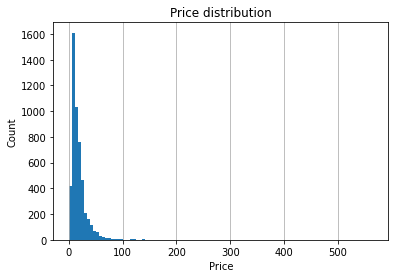

In [135]:
print(df_array['Beauty/Bath & Body/Bath']['price'].median())
df_array['Beauty/Bath & Body/Bath']["price"].plot.hist(grid=True, bins=100)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y')
print(df_array['Beauty/Bath & Body/Bath']['price'].describe())

###Create dict of medians

In [136]:
medians = {}
for i in df_array:
  #medians.append(i["price"].median())
  medians[i] = df_array[i]['price'].median()
print(medians)

{'Beauty/Bath & Body/Bath': 14.0, 'Beauty/Bath & Body/Bathing Accessories': 20.0, 'Beauty/Bath & Body/Cleansers': 10.0, 'Beauty/Bath & Body/Other': 16.0, 'Beauty/Bath & Body/Scrubs & Body Treatments': 18.0, 'Beauty/Bath & Body/Sets': 17.0, 'Beauty/Fragrance/Candles & Home Scents': 18.0, 'Beauty/Fragrance/Kids': 8.0, 'Beauty/Fragrance/Men': 23.0, 'Beauty/Fragrance/Other': 16.0, 'Beauty/Fragrance/Sets': 20.0, 'Beauty/Fragrance/Women': 18.0, 'Beauty/Hair Care/Conditioners': 18.0, 'Beauty/Hair Care/Hair & Scalp Treatments': 14.0, 'Beauty/Hair Care/Hair Color': 10.0, 'Beauty/Hair Care/Hair Loss Products': 16.0, 'Beauty/Hair Care/Hair Perms & Texturizers': 13.0, 'Beauty/Hair Care/Hair Relaxers': 7.0, 'Beauty/Hair Care/Other': 17.0, 'Beauty/Hair Care/Shampoo & Conditioner Sets': 19.0, 'Beauty/Hair Care/Shampoo Plus Conditioner': 21.0, 'Beauty/Hair Care/Shampoos': 14.0, 'Beauty/Hair Care/Styling Products': 13.0, 'Beauty/Hair Care/Styling Tools': 20.0, 'Beauty/Makeup/Body': 8.0, 'Beauty/Makeup/

###Create samples dataframe

In [142]:
sample_set = df_train.sample(frac=0.1, replace=True, random_state=1)
targets = np.array(sample_set['price'].array)
print(targets)

[16. 17. 30. ... 10. 16.  6.]


###Create predictions for samples

In [143]:
predictions = []
for s in sample_set['category_name']:
  #print(medians[s])
  predictions.append(medians[s])

predictions = np.array(predictions)
print(predictions)

[12. 12. 18. ... 13. 14.  9.]


###Calculate RMSLE

In [146]:
print(np.sqrt(np.mean(np.power(np.log1p(predictions) - np.log1p(targets), 2))))

0.6562286004932496
